In [2]:
import geopandas as gpd
import pandas as pd
import pyreadr
from dotenv import load_dotenv
import os

load_dotenv()
os.chdir("/Users/elsecaller/Documents/WORK/kings")
pd.set_option('display.max_columns', None)  # Show all columns
pd.set_option('display.max_rows', None)  # Show all columns

In [4]:
filekey = pd.read_csv("filekey.csv")

place_fp = os.path.join(filekey.loc[filekey['var_name'] == 'pdac_shp', 'filepath'].values[0])
gsp_shp = os.path.join(filekey.loc[filekey['var_name'] == 'gsp_shp', 'filepath'].values[0])

place_bounds = gpd.read_file(place_fp)
gsp_bounds = gpd.read_file(gsp_shp)

gsp_basin_ids = pd.read_csv("EJ_DAC_Paper/Data/gsp_basin_ids.csv")


In [21]:
gsa_bounds_raw = gpd.read_file(os.path.join(filekey.loc[filekey['var_name'] == 'gsa_shp', 'filepath'].values[0]))

#gsa bounds raw where GSA_Name contains 'merced'

gsa_names = gsa_bounds_raw[['GSA_ID', 'GSA_Name']]
gsa_names.loc[:,'GSA_Name'] = (gsa_names['GSA_Name']
                         .str.replace('GSA', 'Groundwater Sustainability Agency')
                         .str.replace('[ -]+', '_', regex=True)
                         .str.replace('.', '')
                         .str.lower()
                         .str.replace)

,GSA_ID,GSA_Name
0,191,county_of_merced_groundwater_sustainability_ag...
1,330,verbenia_groundwater_sustainability_agency
2,333,city_of_lakeport_groundwater_sustainability_ag...
3,334,county_of_san_luis_obispo_groundwater_sustaina...
4,338,santa_margarita_groundwater_agency_groundwater...
5,342,ukiah_valley_basin_groundwater_sustainability_...
6,343,stewart_tract_groundwater_sustainability_agency
7,406,wyandotte_creek_groundwater_sustainability_agency
8,166,coachella_valley_water_district_groundwater_su...
9,408,county_of_fresno_groundwater_sustainability_ag...


In [13]:
gsp_bounds[['GSP_ID', 'GSA_IDs']]


,GSP_ID,GSA_IDs
0,13,"302,301,17,237,66,214,13,206"
1,14,30
2,58,314
3,75,370
4,76,359
5,81,260
6,89,253
7,100,"247,233,209,118,454"
8,145,"190,410,408"
9,11,24


<Axes: >

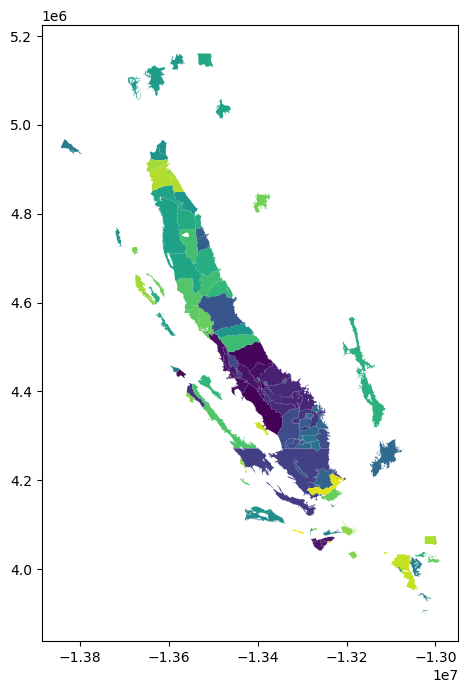

In [19]:
gsp_bounds.plot(column='GSP_ID', figsize=(10, 8))


In [5]:
place_bounds = place_bounds[['GEOID20', 'NAME20', 'Pop20', 'MHI20', 'HH20', 'DAC20', 'geometry']]
gsp_bounds = gsp_bounds[['GSP_ID', 'Basin_Name', 'Basin_Numb', 'Basin_Subb', 'Basin_Su_1', 'GSA_IDs', 'geometry']]

print(place_bounds.shape)
print(gsp_bounds.shape)

(1611, 7)
(120, 7)


In [7]:
intersections = gpd.overlay(place_bounds, gsp_bounds, how='intersection')

In [8]:
unique_places = intersections.dissolve(by='GSP_ID', 
                                       as_index=False,
                                       aggfunc = {
                                           'NAME20': lambda x: x.unique(),
                                           'GEOID20': lambda x: x.unique(),
                                           'Basin_Name': lambda x: x.unique()[0],
                                           'Basin_Numb': lambda x: x.unique()[0], 
                                           'Basin_Subb': lambda x: x.unique()[0],
                                           'GSA_IDs': lambda x: x.unique(),   
                                       }) 

print(unique_places.shape)

(116, 8)


In [9]:
unique_places.head()

,GSP_ID,geometry,NAME20,GEOID20,Basin_Name,Basin_Numb,Basin_Subb,GSA_IDs
0,8,"MULTIPOLYGON (((-13395343.136 4370835.256, -13...","[Huron, Mendota, Avenal, Cantua Creek, Kettlem...","[0636084, 0646828, 0603302, 0610816, 0638394, ...",SAN JOAQUIN VALLEY,5-022,5-022.09,[40]
1,9,"MULTIPOLYGON (((-13416148.092 4458007.678, -13...","[Livingston, Atwater, Merced, Bear Creek, Cres...","[0642006, 0603162, 0646898, 0604632, 0617078, ...",SAN JOAQUIN VALLEY,5-022,5-022.04,"[311,223,219]"
2,11,"MULTIPOLYGON (((-13571269.709 4435116.177, -13...","[Santa Cruz, Capitola, Scotts Valley, Aptos, A...","[0669112, 0611040, 0670588, 0602378, 0602382, ...",SANTA CRUZ MID-COUNTY,3-001,3-001,[24]
3,12,"POLYGON ((-13382870.349 4453458.192, -13382869...","[Chowchilla, Fairmead]","[0613294, 0623210]",SAN JOAQUIN VALLEY,5-022,5-022.05,"[61,191,68,394]"
4,13,"MULTIPOLYGON (((-13489393.216 4508105.075, -13...","[Newman, Patterson, Modesto, Crows Landing, Gr...","[0651140, 0656112, 0648354, 0617428, 0630882, ...",SAN JOAQUIN VALLEY,5-022,5-022.07,"[302,301,17,237,66,214,13,206]"


In [10]:
unique_places.drop_duplicates(subset = ['GSP_ID'],inplace=True)

expected_places = unique_places.drop(columns=['geometry', 'Basin_Numb', 'Basin_Name']).explode(['NAME20', 'GEOID20'])

expected_places['NAME20'] = expected_places['NAME20'].str.replace(' ', '_').str.lower()

expected_places['GEOID20'] = expected_places['GEOID20'].astype(int)

# expected_places.to_csv("EJ_DAC_Paper/Data/expected_places.csv", index=False)


In [12]:
expected_places

,GSP_ID,NAME20,GEOID20,Basin_Subb,GSA_IDs
0,8,huron,636084,5-022.09,[40]
0,8,mendota,646828,5-022.09,[40]
0,8,avenal,603302,5-022.09,[40]
0,8,cantua_creek,610816,5-022.09,[40]
0,8,kettleman_city,638394,5-022.09,[40]
0,8,lemoore_station,641166,5-022.09,[40]
0,8,three_rocks,678652,5-022.09,[40]
0,8,westside,684863,5-022.09,[40]
1,9,livingston,642006,5-022.04,"[311,223,219]"
1,9,atwater,603162,5-022.04,"[311,223,219]"
